# (Inverted) Harmonic Oscillator QNM

The (inverted) harmonic oscillator potential, displaced by one unit in the vertical axis so as to have positive values, is given by: \
\
$ V(x) = 1 - x^2$ \
\
The Schrödinger equation gives:\
\
$\dfrac{d^2\phi}{dx^2} + (1-x^2)\phi = -\omega^2\phi \implies \dfrac{d^2\phi}{dx^2} + (1 - x^2 + \omega^2) = 0 $

## Plot of the inverted harmonic oscillator potential (compared to the Poschl-Teller potential)

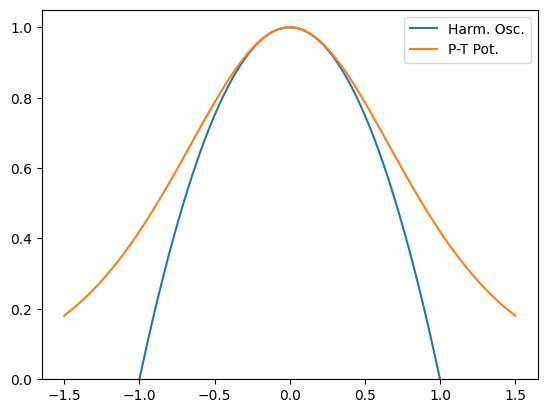

In [400]:
import numpy as np
import matplotlib.pyplot as plt

#POSCHL-TELLER POTENTIAL (Just to compare)
def V_PT(x):

    return 4/( ( np.e**(-x) + np.e**x )**2 )

#HARMONIC OSCILLATOR POTENTIAL
def V(x):

    return 1-x**2

x = np.linspace(-1.5,1.5,100)
plt.plot(x,V(x), label="Harm. Osc.")
plt.plot(x, V_PT(x), label="P-T Pot.")
plt.ylim((0,1.05))
plt.legend()
plt.show()

## Schrödinger-like equation manipulation

We begin our analysis by manipulating the Schrödinger equation into an equation of the form required for the Asymptotic Iteration Method.

In [401]:
from sympy import *

x,y = symbols("x y", real=True)
w = symbols("\omega")

psi = Function("\psi")(x)
psi_new = Function("\psi")(y)

In [402]:
#Define Schrödinger-like equation for the inverted harmonic oscillator
sch_eq = Eq( diff(diff(psi, x), x)+(1-x**2+w**2)*psi, 0 )
sch_eq

Eq((\omega**2 - x**2 + 1)*\psi(x) + Derivative(\psi(x), (x, 2)), 0)

It is convenient to write this equation in terms of a bounded variable. For example, consider change of variable $y = \tan(x)$, so that $y \in (-1,+1)$.

In [403]:
#Function to change variables (https://stackoverflow.com/questions/57840957/differential-equation-change-of-variables-with-sympy)
def variable_change(ODE,dependent_var, 
                    independent_var,
                    new_dependent_var = None, 
                    new_independent_var= None, 


                    dependent_var_relation = None,
                    independent_var_relation = None,
                    order = 2):





    if new_dependent_var == None:
        new_dependent_var = dependent_var
    if new_independent_var == None:
        new_independent_var = independent_var




    # dependent variable change

    if new_independent_var != independent_var:

        for i in range(order, -1, -1):

            # remplace derivate
            a = diff(dependent_var , independent_var, i )
            ξ = Function("ξ")(independent_var)

            b = diff( dependent_var.subs(independent_var, ξ),  independent_var  ,i)

            rel = solve(independent_var_relation, new_independent_var)[0]


            for j in range(order, 0, -1):
                b = b.subs( diff(ξ,independent_var,j), diff(rel,independent_var,j))

            b = b.subs(ξ, new_independent_var)

            rel = solve(independent_var_relation, independent_var)[0]
            b = b.subs(independent_var, rel)


            ODE =   ODE.subs(a,b)

        ODE = ODE.subs(independent_var, rel)


    # change of variables of indpendent variable


    if new_dependent_var != dependent_var:

        ODE = (ODE.subs(dependent_var.subs(independent_var,new_independent_var) , (solve(dependent_var_relation, dependent_var)[0])))
        ODE = ODE.doit().expand()

    return ODE.simplify()

Perform the change of variable

In [404]:
display(sch_eq)

sch_eq_y = variable_change(
    ODE=sch_eq, 
    independent_var=x,
    new_independent_var=y,
    independent_var_relation=Eq(y,tan(x)),
    dependent_var=psi, 
    new_dependent_var=psi, 
    dependent_var_relation=None, 
    order=2)

display(sch_eq_y)

Eq((\omega**2 - x**2 + 1)*\psi(x) + Derivative(\psi(x), (x, 2)), 0)

Eq(2*y*(y**2 + 1)*Derivative(\psi(y), y) + (y**2 + 1)**2*Derivative(\psi(y), (y, 2)) + (\omega**2 - atan(y)**2 + 1)*\psi(y), 0)

In [414]:
sch_eq_y_lhs = sch_eq_y.lhs*(y**2+1)**(-2)
A,B,C = symbols("A B C") #A,B,C represent second, first and zero-th order derivatives of phi
sch_eq_y_lhs = sch_eq_y_lhs.subs( diff(diff(psi_new,y),y), A ).subs( diff(psi_new,y), B ).subs(psi_new, C)
display(sch_eq_y_lhs)

(A*(y**2 + 1)**2 + 2*B*y*(y**2 + 1) + C*(\omega**2 - atan(y)**2 + 1))/(y**2 + 1)**2

In [415]:
sch_eq_y_lhs = A + 2*y*B/(y**2+1) + C*(w**2-atan(y)**2+1)/(y**2+1)**2
sch_eq_y_lhs

A + 2*B*y/(y**2 + 1) + C*(\omega**2 - atan(y)**2 + 1)/(y**2 + 1)**2

Now, we must implement the boundary conditions in order to obtain the quasinormal modes. Taking the same as for the Poschl-Teller potential, we have that: \
\
$ \psi = (1-y)^{-i\omega/2}(1+y)^{-i\omega/2}\phi $ \
\
We substitute this into our expression

In [ ]:
psi_sub = (1-y)**(-I*w/2)*(1+y)**(-I*w/2)*phi
sch_eq = sch_eq_y.subs(psi_new, psi_sub).doit()
display(sch_eq)

Now, it would be convenient to group terms with the second derivative, first derivative, etc. and simplify as much as we can to obtain the parameters $\lambda_0$ and $s_0$.

In [ ]:
A,B,C = symbols("A B C") #A,B,C represent second, first and zero-th order derivatives of phi
sch_eq = sch_eq.subs(diff(diff(psi_new,y),y),A).subs(diff(psi,y),B).subs(phi,C)
display(sch_eq)

In [ ]:
sch_lhs = sch_eq.lhs
sch_lhs = sch_lhs.expand().collect(A).collect(B).collect(C)
sch_eq = Eq(sch_lhs,0)
display(sch_eq)
